
TASKS
1. Add one column as \continent" in the dataset and label each country/region
in the dataset to an appropriate continent such as \Europe", \Asia",
\Africa", \North America", \South America", \Australia", or \Antarc-
tica". Explain how do you validate the correctness of your labelling. Out-
put the updated dataset as a new CSV le. (1 point). (Note: You must
write a Python program to complete the labelling, manully labelling won't
get any credit).
2. Write a Python program to nd the country/region in each continent that
has the highest average HIV estimated prevalence of people ages from 15
to 49 of from year 2000 to 2011. Find the country/region in each continent
that has the lowest average HIV estimated prevalence of people ages from
15 to 49 of from year 2000 to 2011. Create a bar chart to show the highest
average HIV estimated prevalence of people ages from 15 to 49 of from year
2000 to 2011 in each continent (1 point). Create a bar chart to show the
lowest average HIV estimated prevalence of people ages from 15 to 49 of
from year 2000 to 2011 in each continent (1 point). Create an overlaid bar
chart to show the highest and lowest average HIV estimated prevalence of
people ages from 15 to 49 of from year 2000 to 2011 in each continent (1
point). Select a country/region that is dierent from the average highest
or lowest HIV estimated prevalence of people ages from 15 to 49 from year
2000 to 2011 from each continent, then create an overlaid line chart for
the selected country/region, the average highest and lowest HIV estimated
prevalence of people ages from 15 to 49 from year 2000 to 2011 for each
continent (1 point).
3. Write a Python progrma to calculate the average HIV estimated preva-
lence of people ages from 15 to 49 for each year in the dataset for each
continent (you only need simply add the estimate prevalence number of
all countries/regions and divided by the number of the countries/regions
in the continent). Based on the calculation, create a line chart for each
continent to show the changes of the average HIV estimated prevalence
from 1979 to 2011 (1 point). Create an overlaid line chart for all conti-
nents to show their changes of the average HIV estimated prevalence from
1
1979 to 2011 (1 point).
4. Create two scatter plots to show the data (i.e. each country/region) in
year 1990 and year 2010, respectively. The vertical axis in the scatter
plot is the HIV estimated prevalence, and the horizontal axis is the corre-
sponding year average HIV estimated prevalence in each continent, which
you calculated above. Using dierent color to show data from dierent
continent (1 point). If you found any interesting result from the charts,
explain it.
5. Write a report to explain how each question is implemented and its output
graphs (2 point).

HOW TO RUN CODE
UPDATE VARIABLE InputFilepath TO LOCATION OF INPUT FILE
SAVE FILES HIVEstimatedPrevalence.csv AND CountryAndContinent.csv IN THE LOCATION
EXECUTE EACH CELL IN THE ORDER
OUTPUT FILE outputHIVTable.csv IS SAVED IN DEFAULT PATH.
IF ANY PARTICULAR LOCATION IS PREFERRED THEN UPDATE VARIABLE outputfilepath

In [11]:
from datascience import Table # Including Table functions from datascience package into the running instance
import os# including os package into running instance
from datascience.predicates import are
import pandas as pd
%matplotlib inline


'''
QUESTION 1
Add one column as continent in the dataset and label each country/region in the dataset to an appropriate 
continent such as Europe", Asia",Africa", North America, South America, Australia, or Antarctica.
Explain how do you validate the correctness of your labelling. Out- put the updated dataset as a new CSV file. 
(1 point). (Note: You must write a Python program to complete the labelling, manully labelling won't get any credit).
'''

#LOAD DATA

#Loading data from CSV file URL address 
InputFilepath='https://raw.githubusercontent.com/babloomarkose/DataInPython/master/Tables_Visualization'
#InputFilepath='/Users/jacobdenny/Desktop/Babloo/Masters/Semester3/Python/DataInPython/Tables_Visualization'
HIVEstimator=Table().read_table(InputFilepath+'/HIVEstimatedPrevalence.csv')

#Print the HIVPrevelence Estimator Table
print("The Input Table:1st 5 rows ")
HIVEstimator.show(5) # Show only the first 20 records
#---------------------------------------------------------------------------------------------------------------------

#CREATE NEW COLOUMN CONTINENT

#Load Table containing list of countries and their continent
CountryToContinent=Table().read_table(InputFilepath+'/CountryAndContinent.csv')

#Join two tables using common colomn Country To add Continent coloumn
HIVEstimator=HIVEstimator.join('Country', CountryToContinent)

#Move Coloumn Continent next to country coloumn
HIVEstimator=HIVEstimator.move_column('Continent',1)

#DATA CLEANING

#1. DATA CLEANING :REMOVE DUPLICATES
pandasDF=HIVEstimator.to_df()
pandasDF.drop_duplicates(keep='first',inplace=True)#keep='first' retains the first among n duplicates and inplace=True modify original record
#2. DATA CLEANING : REMOVE RECORDS THAT HAVE ALL COLOUMNS EMPTY (no values in any coloumns)
pandasDF.dropna(axis=0, how='all',subset=['1979','1980','1981','1982','1983','1984','1985','1986','1987','1988',
                                          '1989','1990','1991','1992','1993','1994','1995','1996','1997','1998',
                                          '1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
                                          '2009','2010','2011'], inplace=True)
pandasDF.dropna(axis=1, how='all',inplace=True)

#Calculate Average per year for Estimated HIV Prevelance for future use
DF  = round(pandasDF.iloc[:,2:35].mean(axis=0), 4)

#Create new colomn 'Average2000_2011', for 2000-2011 Average Estimated HIV Prevelance
pandasDF['Average2000_2011']  = round(pandasDF.iloc[:,23:35].mean(axis=1), 4)
pandasDF['OverAllAverage']  = round(pandasDF.iloc[:,2:35].mean(axis=1), 4)

#Converting back to datascience table after data manipulation
HIVEstimator1=Table.from_df(pandasDF)


#OUTPUT TO FILE
#Verifying Table has new colomn Continent
print("The Table with new colomn 'Continent':1st 5 rows ")
#SORT the table
HIVEstimator1=(HIVEstimator1.sort('Average2000_2011','Desc')).sort('Continent')
#Move colomn 'Average2000_2011', for 2000-2011 Average Estimated HIV Prevelance to index 2
HIVEstimator1=HIVEstimator1.move_column('Average2000_2011',2)

#Write output to file
outputfilepath = os.getcwd()
#outputfilepath='/Users/jacobdenny/Desktop/Babloo/Masters/Semester3/Python'
print(outputfilepath)
HIVEstimator1.to_csv(outputfilepath+'/outputHIVTable.csv')

#Displaying Data from output file
print("Reading from Output file The Cleaned and SORTED new HIVEstimator FILE 5 rows")
HIVEstimatorTable=Table.read_table(outputfilepath+'/outputHIVTable.csv')
HIVEstimatorTable.show(5)
#---------------------------------------------------------------------------------------------------------------------


The Input Table:1st 5 rows 


Country,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Abkhazia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Afghanistan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.06,0.06,0.06
Akrotiri and Dhekelia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Albania,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Algeria,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.1,0.1,0.1,0.1,0.1,nan,nan,nan


The Table with new colomn 'Continent':1st 5 rows 
/Users/jacobdenny/Desktop/Babloo/Masters/Semester3/Python/DataInPython/Tables_Visualization
Reading from Output file The Cleaned and SORTED new HIVEstimator FILE 5 rows


Country,Continent,Average2000_2011,1979,1980,1981,1982,1983,1984,1985,1986,1987,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,OverAllAverage
Swaziland,AFRICA,25.58,nan,nan,nan,0.01097,nan,nan,nan,nan,nan,2.3,3.2,4.4,6.1,8.1,10.6,13.3,16,18.5,20.6,22.3,23.6,24.5,25.1,25.5,25.6,25.7,25.8,25.9,25.8,25.9,26,17.933
Botswana,AFRICA,25.02,0.105976,nan,nan,nan,nan,nan,nan,nan,nan,3.5,5.1,7.3,10.1,13.3,16.6,19.7,22.2,24.1,25.3,26,26.3,26.3,26.1,25.8,25.5,25.3,25.1,24.9,24.1,23.7,23.4,19.7844
Lesotho,AFRICA,23.59,nan,nan,nan,nan,nan,0.0110793,nan,nan,nan,0.8,1.7,3.3,5.9,9.8,14.3,18.5,21.6,23.4,24.2,24.5,24.5,24.3,24.1,23.8,23.6,23.5,23.5,23.6,23,23.2,23.3,18
South Africa,AFRICA,17.77,nan,nan,0.0142086,nan,nan,nan,nan,nan,nan,0.7,1.2,1.8,2.9,4.3,6.1,8.4,10.7,12.9,14.8,16.1,17.1,17.7,18,18.1,18.1,18.1,18,17.9,17.2,17.3,17.3,12.1868
Zimbabwe,AFRICA,17.6,0.01,nan,nan,nan,nan,nan,nan,nan,nan,10.1,13.6,17.2,20.6,23.3,25.1,26.2,26.5,26.3,25.7,24.8,23.7,22.5,21.1,19.8,18.4,17.2,16.1,15.1,15.7,15.2,14.9,19.0296


The List of Countries with Maximum Average HIV Estimator in each Continent


Continent,Country,Average2000_2011
AFRICA,Swaziland,25.58
ASIA,Thailand,1.39
AUSTRALIA,Papua New Guinea,0.75
EUROPE,Estonia,1.1
NORTH AMERICA,Bahamas,2.97
SOUTH AMERICA,Guyana,1.16


The List of Countries with Minimum Average HIV Estimator in each Continent


Continent,Country,Average2000_2011
AFRICA,Tunisia,0.06
AFRICA,Egypt,0.06
ASIA,Turkey,0.06
ASIA,Sri Lanka,0.06
ASIA,South Korea,0.06
ASIA,Qatar,0.06
ASIA,Philippines,0.06
ASIA,Mongolia,0.06
ASIA,Maldives,0.06
ASIA,Japan,0.06


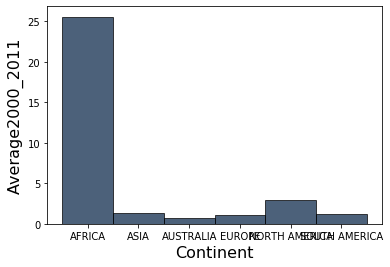

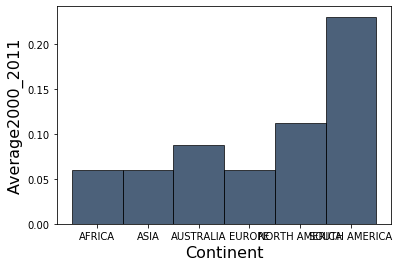

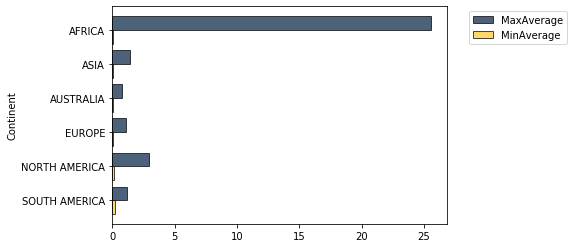

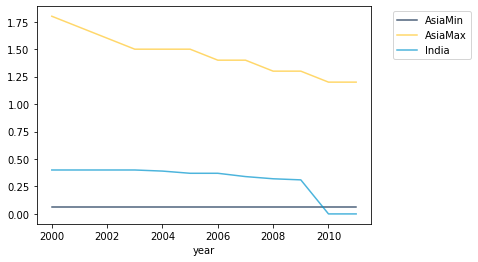

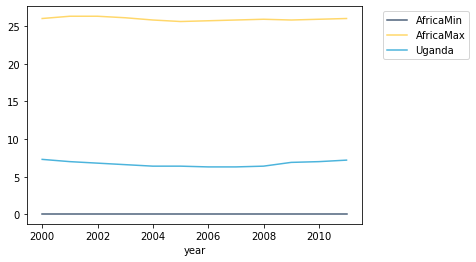

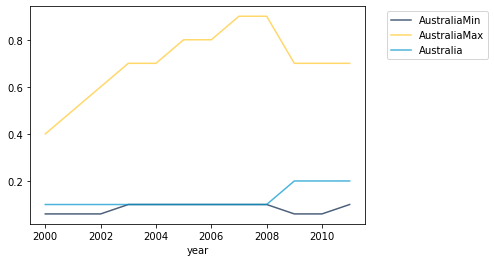

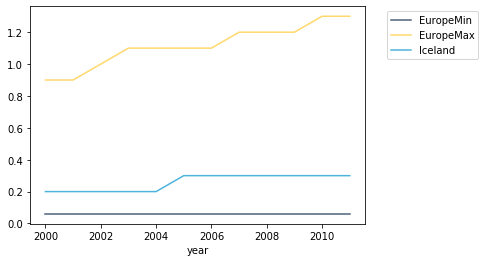

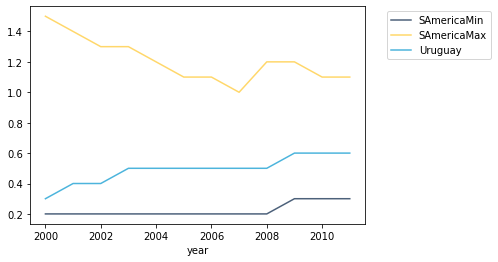

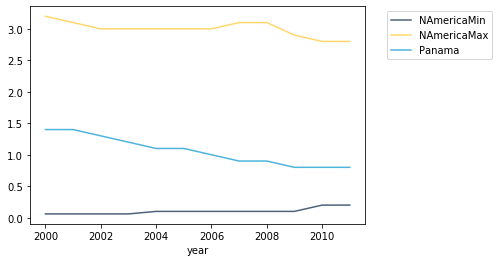

In [12]:
'''
QUESTION 2
Write a Python program to nd the country/region in each continent that has the highest average HIV estimated 
prevalence of people ages from 15 to 49 of from year 2000 to 2011. Find the country/region in each continent 
that has the lowest average HIV estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011. 
Create a bar chart to show the highest average HIV estimated prevalence of people ages from 15 to 49 of 
from year 2000 to 2011 in each continent (1 point). Create a bar chart to show the lowest average HIV 
estimated prevalence of people ages from 15 to 49 of from year 2000 to 2011 in each continent (1 point). Create 
an overlaid bar chart to show the highest and lowest average HIV estimated prevalence of people ages from 15 to 49 
of from year 2000 to 2011 in each continent (1 point). Select a country/region that is dierent from the average
highest or lowest HIV estimated prevalence of people ages from 15 to 49 from year 2000 to 2011 from each continent,
then create an overlaid line chart for the selected country/region, the average highest and lowest HIV estimated
prevalence of people ages from 15 to 49 from year 2000 to 2011 for each continent (1 point).'''

#Create new table with Highest and Lowest Average value per continent 
Highest_average_Per_Continent=HIVEstimator1.select("Continent",'Country','Average2000_2011').group("Continent", max)
Lowest_average_Per_Continent=HIVEstimator1.select("Continent",'Country','Average2000_2011').group("Continent", min)

#Append new tables with average value to HIVEstimator Table and 
#drop string columns that doesnot make sense in a max/min operation
HIVEstimator1=HIVEstimator1.join('Continent', Highest_average_Per_Continent).drop('Country max')
HIVEstimator1=HIVEstimator1.join('Continent', Lowest_average_Per_Continent).drop('Country min')

#HIGHEST AVERAGE PER CONTINENT
#Display countries from each continent having highest HIV Estimator value
print("The List of Countries with Maximum Average HIV Estimator in each Continent")
Highest_average_Per_Continent=HIVEstimator1.select("Continent",'Country','Average2000_2011','Average2000_2011 max').where('Average2000_2011',are.equal_to,'Average2000_2011 max').drop('Average2000_2011 max')
Highest_average_Per_Continent.show(10)

#LOWEST AVERAGE PER CONTINENT
#Display countries from each continent having lowest HIV Estimator value
print("The List of Countries with Minimum Average HIV Estimator in each Continent")
Lowest_average_Per_Continent=HIVEstimator1.select("Continent",'Country','Average2000_2011','Average2000_2011 min').where('Average2000_2011',are.equal_to,'Average2000_2011 min').drop('Average2000_2011 min')
Lowest_average_Per_Continent.show(19)

#BAR CHART: HIGHEST AVERAGE PER CONTINENT
# Bar Chart for countries with highest Average HIV Estimator in each continent
Highest_average_Per_Continent.bar("Continent",'Average2000_2011')
plt.show()
#BAR CHART: LOWEST AVERAGE PER CONTINENT
# Bar Chart for countries with lowest Average HIV Estimator in each continent
#Since there are multiple entries for each continent having the same low value group the table according to continent
Lowest_average_Per_Continent=Lowest_average_Per_Continent.group("Continent", min).relabel('Average2000_2011 min','Average2000_2011').relabel('Country min','Country')
Lowest_average_Per_Continent.bar("Continent",'Average2000_2011',label="The Bar chart Countries with Minimum Average HIV Estimator in each Continent")
plt.show()
#OVERLAID BAR CHART: HIGHEST AND LOWEST AVERAGE PER CONTINENT
Highest_average_Per_Continent=Highest_average_Per_Continent.join("Continent",Lowest_average_Per_Continent).relabel('Average2000_2011','MaxAverage').relabel('Average2000_2011_2','MinAverage')
Highest_average_Per_Continent.select("Continent",'MaxAverage','MinAverage').barh('Continent')

#OVERLAID Line CHART: HIGHEST AND LOWEST  for selected country from each Continent

#For each selected Country save the yearly estiamtes(200-2011), minimum per yer and max per year per continent to new tables
Uganda=HIVEstimator1.where('Country',are.equal_to('Uganda')).drop("Continent",'Average2000_2011','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','Average2000_2011 max', 'Average2000_2011 min')
India=HIVEstimator1.where('Country',are.equal_to('India')).drop("Continent",'Average2000_2011','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','Average2000_2011 max', 'Average2000_2011 min')
Australia=HIVEstimator1.where('Country',are.equal_to('Australia')).drop("Continent",'Average2000_2011','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','Average2000_2011 max', 'Average2000_2011 min')
Iceland=HIVEstimator1.where('Country',are.equal_to('Iceland')).drop("Continent",'Average2000_2011','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','Average2000_2011 max', 'Average2000_2011 min')
Uruguay=HIVEstimator1.where('Country',are.equal_to('Uruguay')).drop("Continent",'Average2000_2011','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','Average2000_2011 max', 'Average2000_2011 min')
Panama=HIVEstimator1.where('Country',are.equal_to('Panama')).drop("Continent",'Average2000_2011','1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','Average2000_2011 max', 'Average2000_2011 min')
Min=HIVEstimator1.select("Continent",'2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011').group("Continent", min)
Max=HIVEstimator1.select("Continent",'2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011').group("Continent", max)

# Append the yearly estimate and minimum and maximum per continent for each year into a single table
HIVEstimatorYearwise=Table().with_columns('year',(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011),
                          'India',(India.column(1).item(0), India.column(2).item(0), India.column(3).item(0), India.column(4).item(0), India.column(5).item(0), India.column(6).item(0), India.column(7).item(0), India.column(8).item(0), India.column(9).item(0), India.column(10).item(0), 0, 0),
                          'Uganda',(Uganda.column(1).item(0), Uganda.column(2).item(0), Uganda.column(3).item(0), Uganda.column(4).item(0), Uganda.column(5).item(0), Uganda.column(6).item(0), Uganda.column(7).item(0), Uganda.column(8).item(0), Uganda.column(9).item(0), Uganda.column(10).item(0), Uganda.column(11).item(0), Uganda.column(12).item(0)),                         
                          'Australia',(Australia.column(1).item(0), Australia.column(2).item(0), Australia.column(3).item(0), Australia.column(4).item(0), Australia.column(5).item(0), Australia.column(6).item(0), Australia.column(7).item(0), Australia.column(8).item(0), Australia.column(9).item(0), Australia.column(10).item(0), Australia.column(11).item(0), Australia.column(12).item(0)),
                          'Iceland',(Iceland.column(1).item(0), Iceland.column(2).item(0), Iceland.column(3).item(0), Iceland.column(4).item(0), Iceland.column(5).item(0), Iceland.column(6).item(0), Iceland.column(7).item(0), Iceland.column(8).item(0), Iceland.column(9).item(0), Iceland.column(10).item(0), Iceland.column(11).item(0), Iceland.column(12).item(0)),                          
                          'Uruguay',(Uruguay.column(1).item(0), Uruguay.column(2).item(0), Uruguay.column(3).item(0), Uruguay.column(4).item(0), Uruguay.column(5).item(0), Uruguay.column(6).item(0), Uruguay.column(7).item(0), Uruguay.column(8).item(0), Uruguay.column(9).item(0), Uruguay.column(10).item(0), Uruguay.column(11).item(0), Uruguay.column(12).item(0)),
                          'Panama',(Panama.column(1).item(0), Panama.column(2).item(0), Panama.column(3).item(0), Panama.column(4).item(0), Panama.column(5).item(0), Panama.column(6).item(0), Panama.column(7).item(0), Panama.column(8).item(0), Panama.column(9).item(0), Panama.column(10).item(0), Panama.column(11).item(0), Panama.column(12).item(0)),
                         'AfricaMin',(Min.column(1).item(0), Min.column(2).item(0), Min.column(3).item(0), Min.column(4).item(0), Min.column(5).item(0), Min.column(6).item(0), Min.column(7).item(0), Min.column(8).item(0), Min.column(9).item(0), Min.column(10).item(0), Min.column(11).item(0), Min.column(12).item(0)),
                         'AfricaMax',(Max.column(1).item(0), Max.column(2).item(0), Max.column(3).item(0), Max.column(4).item(0), Max.column(5).item(0), Max.column(6).item(0), Max.column(7).item(0), Max.column(8).item(0), Max.column(9).item(0), Max.column(10).item(0), Max.column(11).item(0), Max.column(12).item(0)),
                          'AsiaMin',(Min.column(1).item(1), Min.column(2).item(1), Min.column(3).item(1), Min.column(4).item(1), Min.column(5).item(1), Min.column(6).item(1), Min.column(7).item(1), Min.column(8).item(1), Min.column(9).item(1), Min.column(10).item(1), Min.column(11).item(1), Min.column(12).item(1)),
                         'AsiaMax',(Max.column(1).item(1), Max.column(2).item(1), Max.column(3).item(1), Max.column(4).item(1), Max.column(5).item(1), Max.column(6).item(1), Max.column(7).item(1), Max.column(8).item(1), Max.column(9).item(1), Max.column(10).item(1), Max.column(11).item(1), Max.column(12).item(1)),
                         'AustraliaMin',(Min.column(1).item(2), Min.column(2).item(2), Min.column(3).item(2), Min.column(4).item(2), Min.column(5).item(2), Min.column(6).item(2), Min.column(7).item(2), Min.column(8).item(2), Min.column(9).item(2), Min.column(10).item(2), Min.column(11).item(2), Min.column(12).item(2)),
                         'AustraliaMax',(Max.column(1).item(2), Max.column(2).item(2), Max.column(3).item(2), Max.column(4).item(2), Max.column(5).item(2), Max.column(6).item(2), Max.column(7).item(2), Max.column(8).item(2), Max.column(9).item(2), Max.column(10).item(2), Max.column(11).item(2), Max.column(12).item(2)),
                          'EuropeMin',(Min.column(1).item(3), Min.column(2).item(3), Min.column(3).item(3), Min.column(4).item(3), Min.column(5).item(3), Min.column(6).item(3), Min.column(7).item(3), Min.column(8).item(3), Min.column(9).item(3), Min.column(10).item(3), Min.column(11).item(3), Min.column(12).item(3)),
                         'EuropeMax',(Max.column(1).item(3), Max.column(2).item(3), Max.column(3).item(3), Max.column(4).item(3), Max.column(5).item(3), Max.column(6).item(3), Max.column(7).item(3), Max.column(8).item(3), Max.column(9).item(3), Max.column(10).item(3), Max.column(11).item(3), Max.column(12).item(3)),
                          'NAmericaMin',(Min.column(1).item(4), Min.column(2).item(4), Min.column(3).item(4), Min.column(4).item(4), Min.column(5).item(4), Min.column(6).item(4), Min.column(7).item(4), Min.column(8).item(4), Min.column(9).item(4), Min.column(10).item(4), Min.column(11).item(4), Min.column(12).item(4)),
                         'NAmericaMax',(Max.column(1).item(4), Max.column(2).item(4), Max.column(3).item(4), Max.column(4).item(4), Max.column(5).item(4), Max.column(6).item(4), Max.column(7).item(4), Max.column(8).item(4), Max.column(9).item(4), Max.column(10).item(4), Max.column(11).item(4), Max.column(12).item(4)),
                          'SAmericaMin',(Min.column(1).item(5), Min.column(2).item(5), Min.column(3).item(5), Min.column(4).item(5), Min.column(5).item(5), Min.column(6).item(5), Min.column(7).item(5), Min.column(8).item(5), Min.column(9).item(5), Min.column(10).item(5), Min.column(11).item(5), Min.column(12).item(5)),
                         'SAmericaMax',(Max.column(1).item(5), Max.column(2).item(5), Max.column(3).item(5), Max.column(4).item(5), Max.column(5).item(5), Max.column(6).item(5), Max.column(7).item(5), Max.column(8).item(5), Max.column(9).item(5), Max.column(10).item(5), Max.column(11).item(5), Max.column(12).item(5)))

#LINE CHART FOR SELECTED COUNTRY INDIA FROM CONTINENT ASIA OVERLAID WITH HIGHEST AND LOWEST FOR THAT CONTINENT
HIVEstimatorYearwise.select('year','AsiaMin','AsiaMax','India').plot('year')

#LINE CHART FOR SELECTED COUNTRY UGANDA FROM CONTINENT AFRICA OVERLAID WITH HIGHEST AND LOWEST FOR THAT CONTINENT
HIVEstimatorYearwise.select('year','AfricaMin','AfricaMax','Uganda').plot('year')

#LINE CHART FOR SELECTED COUNTRY AUSTRALIA FROM CONTINENT AUSTRALIA OVERLAID WITH HIGHEST AND LOWEST FOR THAT CONTINENT
HIVEstimatorYearwise.select('year','AustraliaMin','AustraliaMax','Australia').plot('year')

#LINE CHART FOR SELECTED COUNTRY ICELAND FROM CONTINENT EUROPE OVERLAID WITH HIGHEST AND LOWEST FOR THAT CONTINENT
HIVEstimatorYearwise.select('year','EuropeMin','EuropeMax','Iceland').plot('year')

#LINE CHART FOR SELECTED COUNTRY URUGUAY FROM CONTINENT SOUTH AMERICA OVERLAID WITH HIGHEST AND LOWEST FOR THAT CONTINENT
HIVEstimatorYearwise.select('year','SAmericaMin','SAmericaMax','Uruguay').plot('year')

#LINE CHART FOR SELECTED COUNTRY PANAMA FROM CONTINENT NORTH AMERICA OVERLAID WITH HIGHEST AND LOWEST FOR THAT CONTINENT
HIVEstimatorYearwise.select('year','NAmericaMin','NAmericaMax','Panama').plot('year')
#---------------------------------------------------------------------------------------------------------------------


In [13]:
'''
QUESTION 3
Write a Python progrma to calculate the average HIV estimated prevalence of people ages from 15 to 49 for each year
in the dataset for each continent (you only need simply add the estimate prevalence number of all countries/regions 
and divided by the number of the countries/regions in the continent). Based on the calculation, create a line chart
for each continent to show the changes of the average HIV estimated prevalence from 1979 to 2011 (1 point). 
Create an overlaid line chart for all conti- nents to show their changes of the average HIV estimated prevalence from 
1979 to 2011 (1 point).'''

#Calculate Average per year FOR EACH CONTINENT


pandasDFAfrica=pandasDF.loc[pandasDF['Continent'] == 'AFRICA']
pandasDF['AverageAfrica']  = round(pandasDFAfrica.iloc[:,4:35].mean(axis=0), 4)
AverageAfrica.plot(legend='TRUE',label='HIV Prevalance in Africa from 1979-2011')
plt.show()

pandasDFAsia=pandasDF.loc[pandasDF['Continent'] == 'ASIA']
pandasDF['AverageAsia']  = round(pandasDFAsia.iloc[:,4:35].mean(axis=1), 4)
AverageAsia.plot(legend='TRUE',label='HIV Prevalance in ASIA  from 1979-2011')
plt.show()

pandasDFAustralia=pandasDF.loc[pandasDF['Continent'] == 'AUSTRALIA']
pandasDF['AverageAustralia'] = round(pandasDFAustralia.iloc[:,4:35].mean(axis=1), 4)
AverageAustralia.plot(legend='TRUE',label='HIV Prevalance in AUSTRALIA from 1979-2011')
plt.show()

pandasDFEurope=pandasDF.loc[pandasDF['Continent'] == 'EUROPE']
pandasDF['AverageEurope']  = round(pandasDFEurope.iloc[:,4:35].mean(axis=1), 4)
AverageEurope.plot(legend='TRUE',label='HIV Prevalance in EUROPE from 1979-2011')
plt.show()

pandasDFNAmerica=pandasDF.loc[pandasDF['Continent'] == 'NORTH AMERICA']
pandasDF['AverageNAmerica']  = round(pandasDFNAmerica.iloc[:,4:35].mean(axis=1), 4)
AverageNAmerica.plot(legend='TRUE',label='HIV Prevalance in NORTH AMERICA from 1979-2011')
plt.show()

pandasDFSAmerica=pandasDF.loc[pandasDF['Continent'] == 'SOUTH AMERICA']
pandasDF['AverageSAmerica']  = round(pandasDFSAmerica.iloc[:,4:35].mean(axis=1), 4)
AverageSAmerica.plot(legend='TRUE',label='HIV Prevalance in SOUTH AMERICA from 1979-2011')
plt.show()

AverageAfrica.plot(legend='TRUE',label='Africa')
AverageAsia.plot(legend='TRUE',label='ASIA')
AverageEurope.plot(legend='TRUE',label='EUROPE')
AverageAustralia.plot(legend='TRUE',label='AUSTRALIA')
AverageNAmerica.plot(legend='TRUE',label='NORTH AMERICA')
AverageSAmerica.plot(legend='TRUE',label='SOUTH AMERICA')
plt.show()


NameError: name 'AverageAfrica' is not defined

/Users/jacobdenny/Desktop/Babloo/Masters/Semester3/Python/DataInPython/Tables_Visualization
Reading from Output file The Cleaned and SORTED new HIVEstimator FILE 5 rows


Continent,Country,Average2000_2011,1979,1980,1981,1982,1983,1984,1985,1986,1987,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,OverAllAverage,Average2000_2011 max,Average2000_2011 min
AFRICA,Swaziland,25.58,nan,nan,nan,0.01097,nan,nan,nan,nan,nan,2.3,3.2,4.4,6.1,8.1,10.6,13.3,16,18.5,20.6,22.3,23.6,24.5,25.1,25.5,25.6,25.7,25.8,25.9,25.8,25.9,26,17.933,25.58,0.06
AFRICA,Botswana,25.02,0.105976,nan,nan,nan,nan,nan,nan,nan,nan,3.5,5.1,7.3,10.1,13.3,16.6,19.7,22.2,24.1,25.3,26,26.3,26.3,26.1,25.8,25.5,25.3,25.1,24.9,24.1,23.7,23.4,19.7844,25.58,0.06
AFRICA,Lesotho,23.59,nan,nan,nan,nan,nan,0.0110793,nan,nan,nan,0.8,1.7,3.3,5.9,9.8,14.3,18.5,21.6,23.4,24.2,24.5,24.5,24.3,24.1,23.8,23.6,23.5,23.5,23.6,23,23.2,23.3,18,25.58,0.06
AFRICA,South Africa,17.77,nan,nan,0.0142086,nan,nan,nan,nan,nan,nan,0.7,1.2,1.8,2.9,4.3,6.1,8.4,10.7,12.9,14.8,16.1,17.1,17.7,18,18.1,18.1,18.1,18,17.9,17.2,17.3,17.3,12.1868,25.58,0.06
AFRICA,Zimbabwe,17.6,0.01,nan,nan,nan,nan,nan,nan,nan,nan,10.1,13.6,17.2,20.6,23.3,25.1,26.2,26.5,26.3,25.7,24.8,23.7,22.5,21.1,19.8,18.4,17.2,16.1,15.1,15.7,15.2,14.9,19.0296,25.58,0.06


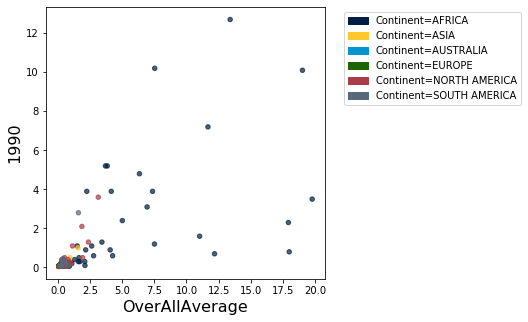

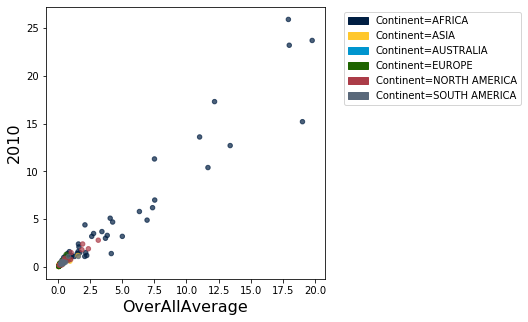

In [5]:
'''
QUESTION 4
Create two scatter plots to show the data (i.e. each country/region) in year 1990 and year 2010, respectively. 
The vertical axis in the scatter plot is the HIV estimated prevalence, and the horizontal axis is the corresponding 
year average HIV estimated prevalence in each continent, which you calculated above. Using different color to show data
from different continent (1 point). If you found any interesting result from the charts, explain it.'''

#Get the necessary data into new Table
ScatterData1= HIVEstimator1.select('Continent','Country','1990','OverAllAverage')
ScatterData2 = HIVEstimator1.select('Continent','Country','2010','OverAllAverage')
#The overall average of each country is plotted against the HIV estimated prevalence data for year  1990
ScatterData1.scatter('OverAllAverage','1990',group='Continent')
#The overall average of each country is plotted against the HIV estimated prevalence data for year  2010
ScatterData2.scatter('OverAllAverage','2010',group='Continent')

#Write final output to file
outputfilepath = os.getcwd()
#outputfilepath='/Users/jacobdenny/Desktop/Babloo/Masters/Semester3/Python'
print(outputfilepath)
HIVEstimator1.to_csv(outputfilepath+'/outputHIVTable.csv')

#Displaying Data from output file
print("Reading from Output file The Cleaned and SORTED new HIVEstimator FILE 5 rows")
HIVEstimatorTable=Table.read_table(outputfilepath+'/outputHIVTable.csv')
HIVEstimatorTable.show(5)


QUESTION 5
Write a report to explain how each question is implemented and its output graphs (2 point).

Report

Part 1
A CSV file with all countries mapped to respective continent is acquired online. This file is loaded into a datascience table and joined to the Input table. The joining is based on the common column Country. And the countries are prepared in the same format as the input table. So Continents are mapped to each country in the input table
Here a new column Average2000_2011 is calculated by taking mean of all vaues from columns 2000 to 2011  across all rows. This is used in the next task

Part 2
 
Create new tables for Highest and Lowest Average value, by selecting colomns Continent Country and Average2000_2011, and group it per continent to find maximum and minimum values per continent from Average2000_2011 calulated in the previous step.This table is appeneded to input table as  Average2000_2011 min and Average2000_2011 max columns and year fields from 1979 to 1999 are dropped. 
Country with the highest is found by comparing values of average and highest average and only those records are retained in the new table.

Same is done for Lowest average value. As there are multiple countries with same low values output table has multiple entries one for each country-continent pair

The new table created here is used to plot highest average HIV prevalance per continent . For Highest Average value, it is straight forward. For lowest we need to select only one among the multiple lowest value. This is done by grouping again only based on Continent and selecting min.

The new tables created are joined on column Continent and used to plot minimum, maximum overlaid barchart across each continent

One country is selected from each continent and that country's row is selected with just values from year 2000 to 2011 country,continent,and min/max of each continent columns
A new Table is created with each of these country as columns. This table is ploted to get minimum,maximum per continent and the selected ountry in that continent

Part 3

New/Seperate data frame is created for each continent and mean is calculated on axis =1 for 1979 to 2011 to get average of each year. For each continent this table is plotted seperately and for the overlaid chart, these are plotted in a single plot.

Part 4

The overall average of each country is plotted against the HIV estimated prevalence data for year 1990 and in second scatter the overall average of each country is plotted against the HIV estimated prevalence data for year 2010.
It is to be noted that in year 1990 the number of countries with HIV estimated prevalence significantly different fron the overall average was more. But in 2010 both these values are almost same.
Secondly, overall average didnot increase significantly in 2010,but African countries are showing an drastic increase compared to 1990.The overall average remained almost same as the HIV estimated prevalencein other continents decreased.